In [1]:
!pip install --upgrade scipy
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


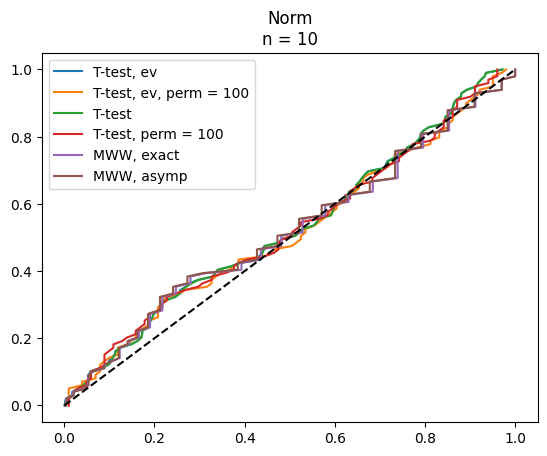

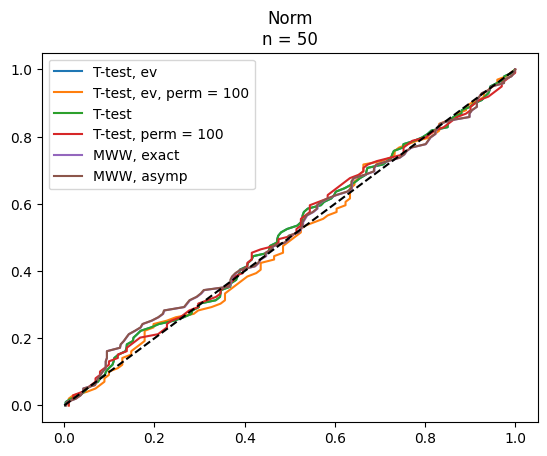

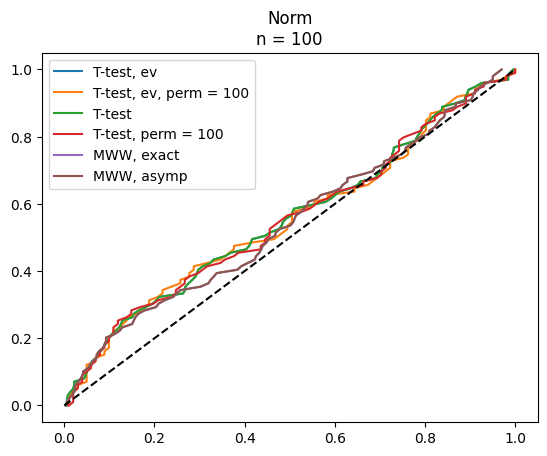

In [ ]:
ss = (10, 50, 100)

division_rate = 100
mu = 0.1

def get_pvals(test_a, test_b, mode, ss, params):
    if mode == 1:
        result = [stats.ttest_ind(test_a[i], test_b[i], equal_var = params[0], permutations = params[1]).pvalue for i in range(division_rate)]
    else:
        result = [stats.mannwhitneyu(test_a[i], test_b[i], method = params).pvalue for i in range(division_rate)]
    return result

y = np.linspace(0,1, division_rate)
for ss in ss:
    fig, ax = plt.subplots()
    plt.title(f"Norm\nn = {ss}")
    test_a = stats.norm.rvs(size=(division_rate, ss))
    test_b = stats.norm(loc=mu, scale=1).rvs(size=(division_rate, ss))

    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (True, None))), y, label = "T-test, ev")
    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (True, 100))), y, label = "T-test, ev, perm = 100")
    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (False, None))), y, label = "T-test")
    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (False, 100))), y, label = "T-test, perm = 100")
    ax.plot(np.sort(get_pvals(test_a, test_b, 2, ss, 'exact')), y, label = "MWW, exact")
    ax.plot(np.sort(get_pvals(test_a, test_b, 2, ss, 'asymptotic')), y, label = "MWW, asymp")
    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

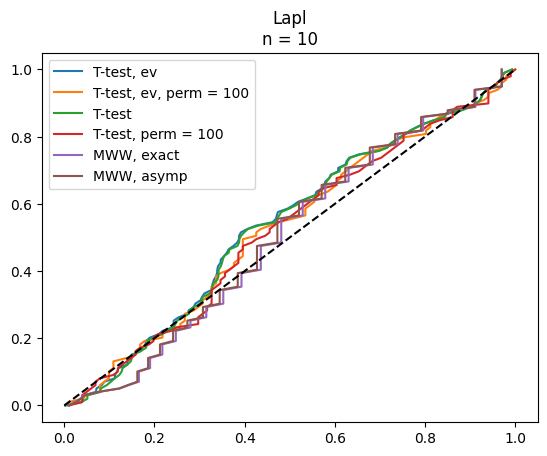

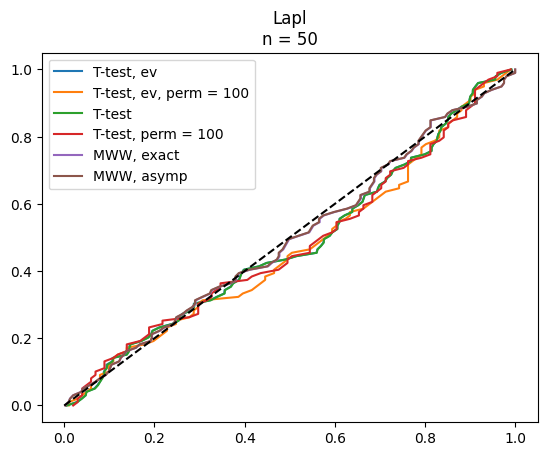

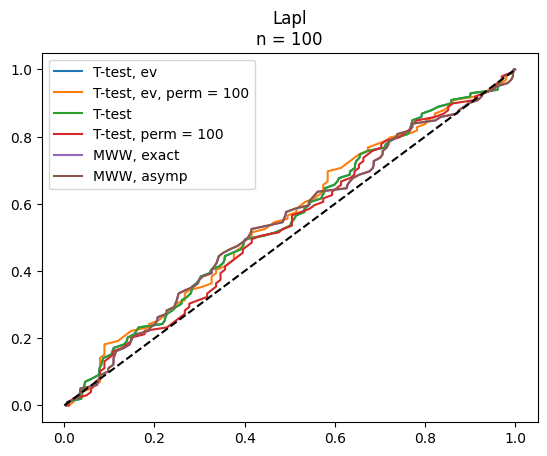

In [ ]:
ss = (10, 50, 100)
for ss in ss:
    fig, ax = plt.subplots()
    plt.title(f"Lapl\nn = {ss}")
    test_a = stats.laplace.rvs(size=(division_rate, ss))
    test_b = stats.laplace(loc=mu, scale=2).rvs(size=(division_rate, ss))

    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (True, None))), y, label = "T-test, ev")
    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (True, 100))), y, label = "T-test, ev, perm = 100")
    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (False, None))), y, label = "T-test")
    ax.plot(np.sort(get_pvals(test_a, test_b, 1, ss, (False, 100))), y, label = "T-test, perm = 100")
    ax.plot(np.sort(get_pvals(test_a, test_b, 2, ss, 'exact')), y, label = "MWW, exact")
    ax.plot(np.sort(get_pvals(test_a, test_b, 2, ss, 'asymptotic')), y, label = "MWW, asymp")
    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

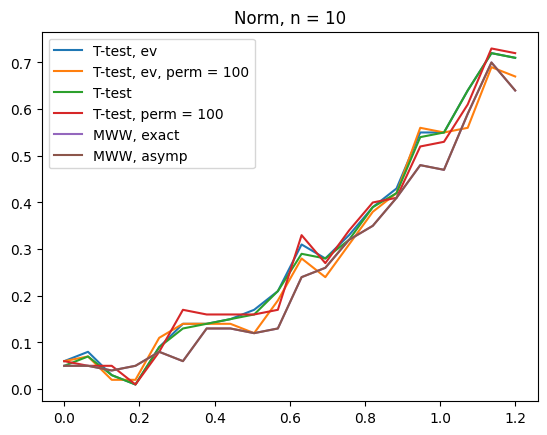

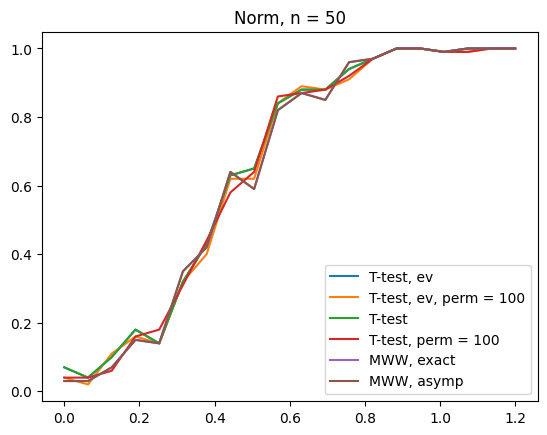

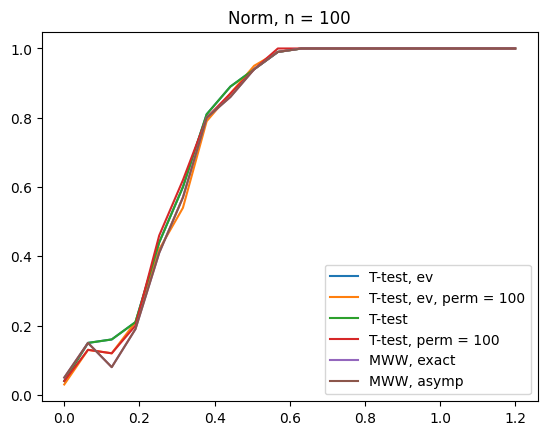

In [ ]:
mu_test = np.linspace(0,1.2,20)
division_rate = 100
alpha = 0.05
ss = (10, 50, 100)
def get_power(test_a, test_b, mode, ss, params):
    pvals = get_pvals(test_a, test_b, mode, ss, params)
    check = np.array(pvals) < alpha
    power = sum(check)/division_rate
    return power
def draw(sample, name):
    ax.plot(mu_test, sample, label = f"{name}")
for ss in ss:
    fig, ax = plt.subplots()
    plt.title(f"Norm, n = {ss}")
    power1 = []
    power2 = []
    power3 = []
    power4 = []
    power5 = []
    power6 = []
    for mu in mu_test:
        test_a = stats.norm.rvs(size=(division_rate, ss))
        test_b = stats.norm(loc=mu, scale=1).rvs(size=(division_rate, ss))

        power1.append(get_power(test_a, test_b, 1, ss, (True, None)))
        power2.append(get_power(test_a, test_b, 1, ss, (True, 100)))
        power3.append(get_power(test_a, test_b, 1, ss, (False, None)))
        power4.append(get_power(test_a, test_b, 1, ss, (False, 100)))
        power5.append(get_power(test_a, test_b, 2, ss, 'exact'))
        power6.append(get_power(test_a, test_b, 2, ss, 'asymptotic'))
    draw(power1, "T-test, ev")
    draw(power2, "T-test, ev, perm = 100")
    draw(power3, "T-test")
    draw(power4, "T-test, perm = 100")
    draw(power5, "MWW, exact")
    draw(power6, "MWW, asymp")
    plt.legend()

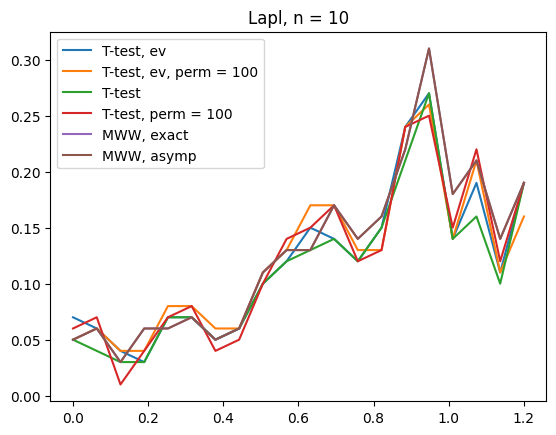

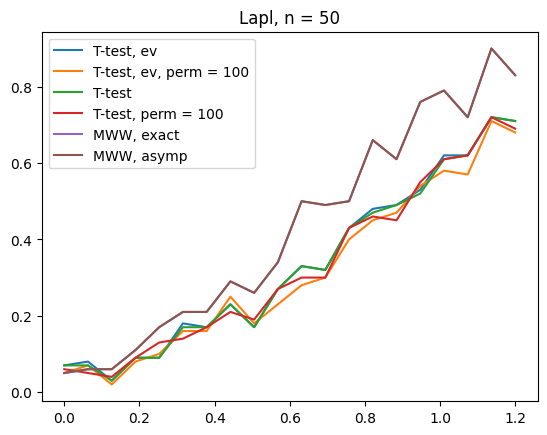

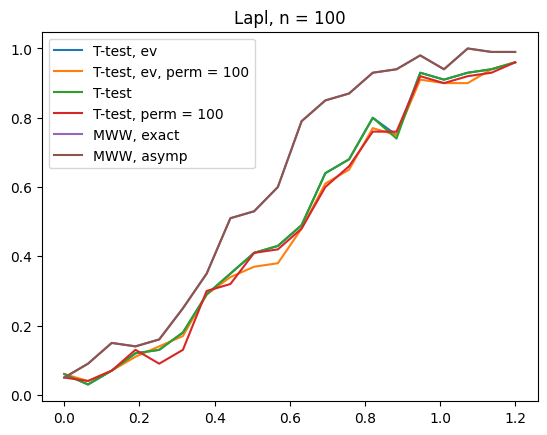

In [ ]:
ss = (10, 50, 100)
for ss in ss:
    fig, ax = plt.subplots()
    plt.title(f"Lapl, n = {ss}")
    power1 = []
    power2 = []
    power3 = []
    power4 = []
    power5 = []
    power6 = []
    for mu in mu_test:
        test_a = stats.laplace.rvs(size=(division_rate, ss))
        test_b = stats.laplace(loc=mu, scale=2).rvs(size=(division_rate, ss))

        power1.append(get_power(test_a, test_b, 1, ss, (True, None)))
        power2.append(get_power(test_a, test_b, 1, ss, (True, 100)))
        power3.append(get_power(test_a, test_b, 1, ss, (False, None)))
        power4.append(get_power(test_a, test_b, 1, ss, (False, 100)))
        power5.append(get_power(test_a, test_b, 2, ss, 'exact'))
        power6.append(get_power(test_a, test_b, 2, ss, 'asymptotic'))
    draw(power1, "T-test, ev")
    draw(power2, "T-test, ev, perm = 100")
    draw(power3, "T-test")
    draw(power4, "T-test, perm = 100")
    draw(power5, "MWW, exact")
    draw(power6, "MWW, asymp")
    plt.legend()

In [ ]:
!pip install scipy --upgrade packageName

ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement packageName (from versions: none)
ERROR: No matching distribution found for packageName


In [ ]:
!pip3 install scipy --upgrade

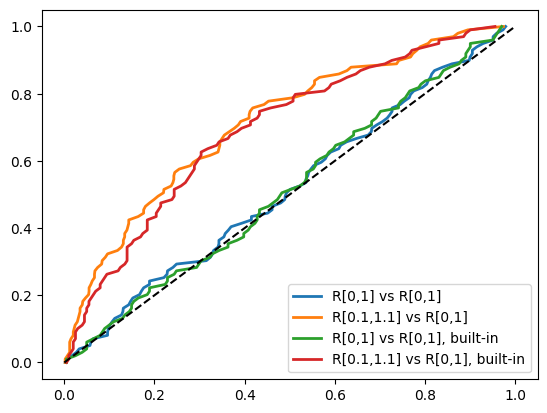

In [2]:



def get_sum(n1:int, n2:int, ranks:np.array):
    const = (n1+1)/(2*n2*(n1+n2))
    arr = []
    for i in range(n1):
        num = (ranks[i] - (n1+n2)*(i+1)/n1)**2
        den = (i+1)*(1-(i+1)/(n1+1))
        arr = np.append(arr, num/den)
    res = arr.sum()
    return const*res
def BWS_stat(sample1, sample2):
    ss1 = len(sample1)
    ss2 = len(sample2)
    res = stats.rankdata(np.concatenate((sample1, sample2)))
    res1 = np.sort(res[0:ss1])
    res2 = np.sort(res[ss1:ss2+ss1])
    sum1 = get_sum(ss1,ss2,res1)
    sum2 = get_sum(ss2,ss1,res2)
    stat = sum1 + sum2
    return stat
def monte_carlo_test(data, statistic):
    size = len(data)
    pvalue = (data>statistic).sum()/size
    return pvalue
def get_test_result(num_samp, ss1, ss2):
    rvs1 = stats.uniform.rvs(size=(num_samp,ss1))
    rvs2 = stats.uniform.rvs(size=(num_samp,ss2))
    test_results = [BWS_stat(rvs1[i], rvs2[i]) for i  in range(num_samp)]
    return test_results
def get_pvals(data1, data2, test_result): #data is 2darray
    num_given_samp = len(data1)
    data_results = [BWS_stat(data1[i], data2[i]) for i  in range(num_given_samp)]
    pvals = np.sort(list(map(lambda x: monte_carlo_test(test_results, x), data_results)))
    return pvals
def get_pvals_anderson(data1, data2):
    rng = np.random.default_rng()
    method = stats.PermutationMethod(n_resamples=200, random_state=rng)
    pvals = []
    for i in range(len(data1)):
        pvals.append(stats.anderson_ksamp([data1[i], data2[i]], midrank=True, method=method).pvalue)
    pvals.sort()
    return pvals



test_results = get_test_result(1000, 100, 300)



fig, ax = plt.subplots()

ss1 = 10
ss2 = 30
division_rate = 100

sample1 = stats.uniform.rvs(size=(division_rate,ss1))
sample2 = stats.uniform.rvs(size=(division_rate,ss2))

sample3 = stats.uniform.rvs(size=(division_rate,ss1))
sample4 = stats.uniform(loc=0.1, scale=1).rvs(size=(division_rate,ss2))

y = np.linspace(0,1, division_rate)
ax.plot(get_pvals(sample1, sample2, test_results), y, lw = 2, label = 'R[0,1] vs R[0,1]')
ax.plot(get_pvals(sample3, sample4, test_results), y, lw = 2, label = 'R[0.1,1.1] vs R[0,1]')
ax.plot(get_pvals_anderson(sample1, sample2), y, lw = 2, label = 'R[0,1] vs R[0,1], built-in')
ax.plot(get_pvals_anderson(sample3, sample4), y, lw = 2, label = 'R[0.1,1.1] vs R[0,1], built-in')


ax.plot(y,y, linestyle='dashed', c='black')
ax.legend()



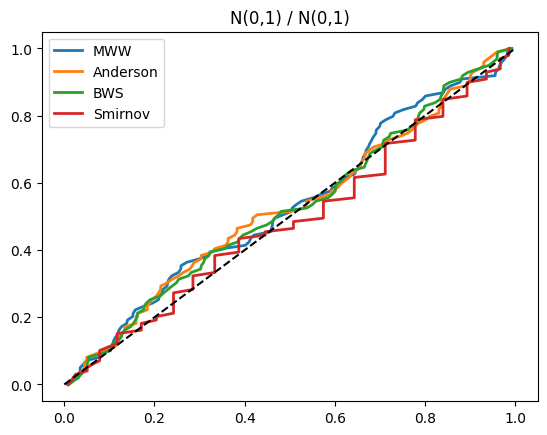

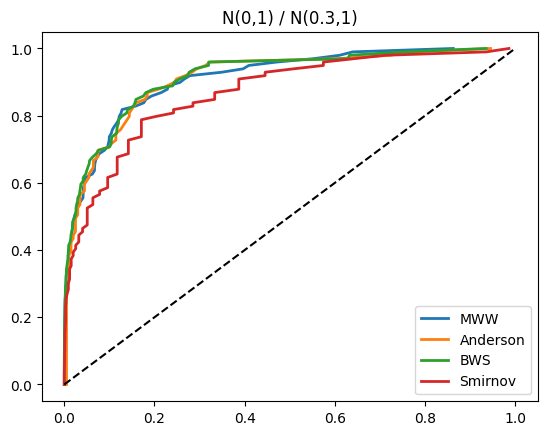

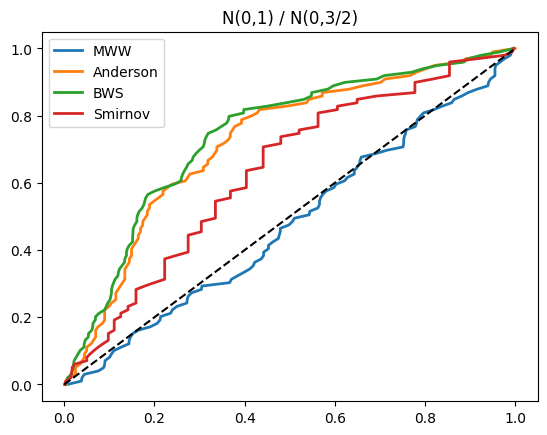

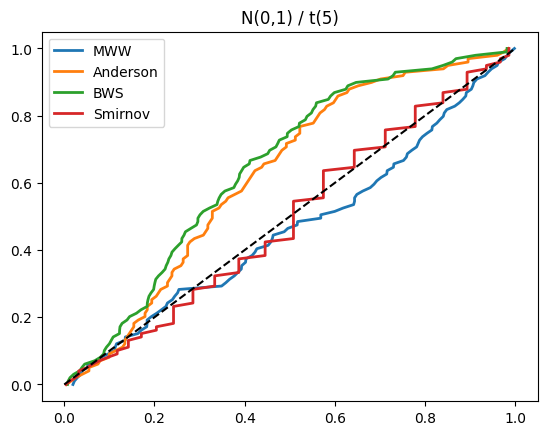

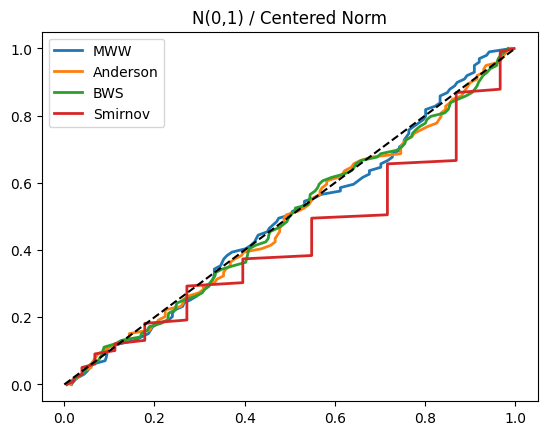

In [3]:
division_rate = 100
def get_pvals_mww(data1, data2):
    res = [stats.mannwhitneyu(data1[i], data2[i]).pvalue for i in range(division_rate)]
    res.sort()
    return res
def get_pvals_anderson(data1, data2):
    rng = np.random.default_rng()
    method = stats.PermutationMethod(n_resamples=200, random_state=rng)
    pvals = []
    for i in range(len(data1)):
        pvals.append(stats.anderson_ksamp((data1[i], data2[i]), method = method).pvalue)
    pvals.sort()
    return pvals
def get_pvals_bws(data1, data2):
    res = [stats.bws_test(data1[i], data2[i]).pvalue for i in range(division_rate)]
    res.sort()
    return res
def get_pvals_smirnov(data1, data2):
    res = [stats.ks_2samp(data1[i], data2[i]).pvalue for i in range(division_rate)]
    res.sort()
    return res
def task(sample1, sample2, name):
    fig, ax = plt.subplots()
    plt.title(f"{name}")
    y = np.linspace(0,1, division_rate)
    ax.plot(get_pvals_mww(sample1, sample2), y, lw = 2, label = 'MWW')
    ax.plot(get_pvals_anderson(sample1, sample2), y, lw = 2, label = 'Anderson')
    ax.plot(get_pvals_bws(sample1, sample2), y, lw = 2, label = 'BWS')
    ax.plot(get_pvals_smirnov(sample1, sample2), y, lw = 2, label = 'Smirnov')
    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

ss1 = 100
ss2 = 200
sample1 = stats.norm.rvs(size=(division_rate,ss1))
sample2 = stats.norm.rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) / N(0,1)')

sample1 = stats.norm.rvs(size=(division_rate,ss1))
sample2 = stats.norm(loc=0.3).rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) / N(0.3,1)')

ss1 = 100
ss2 = 150
sample1 = stats.norm.rvs(size=(division_rate,ss1))
sample2 = stats.norm(scale=np.sqrt(3/2)).rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) / N(0,3/2)')

ss1 = 100
ss2 = 200
sample1 = stats.norm.rvs(size=(division_rate,ss1))
sample2 = stats.t(5).rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) / t(5)')

ss1 = 50
ss2 = 50
sample1 = stats.norm.rvs(size=(division_rate,ss1))
k = 3
sample2 = []
for j in range(division_rate):
    subsample = []
    for i in range (ss2):
        rvs = stats.uniform(loc = -1, scale = 2).rvs(size=k)
        rvs = rvs.sum()/(np.sqrt(k/3))
        subsample = np.append(subsample, rvs)
    sample2.append(subsample)
task(sample1, sample2, 'N(0,1) / Centered Norm')